In [19]:
# Task 4 - Sentiment Analysis using NLP
# -------------------------------------

# 📦 Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 📂 Load Dataset
df = pd.read_csv("C:/Users/naveen/Downloads/Tweets.csv")
df.head()


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


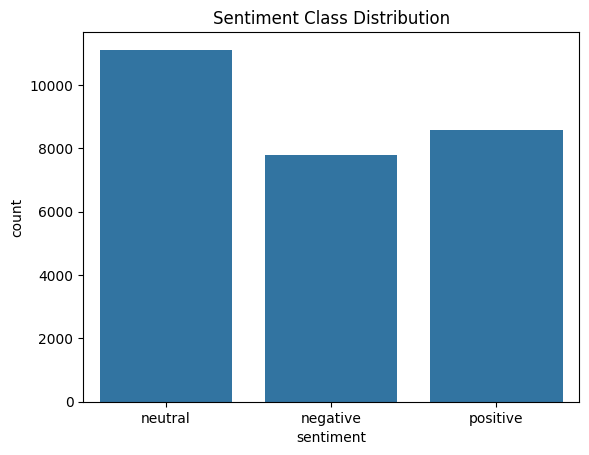

In [20]:
# Check for missing values
df.isnull().sum()

# Drop rows with missing values in important columns
df = df.dropna(subset=['text', 'sentiment'])

# Optional: Visualize class distribution
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Class Distribution")
plt.show()

# Encode target labels
le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

# Clean text (basic)
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r"[^\w\s]", '', text)
    text = re.sub(r"\d+", '', text)
    return text

df['cleaned_text'] = df['text'].apply(clean_text)


In [24]:
# ✅ Required Imports
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ✅ If not already defined, define these before evaluation
# (only needed if you didn’t run them before)
# X = df['cleaned_text']
# y = df['sentiment_encoded']
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# pipeline.fit(X_train, y_train)
# y_pred = pipeline.predict(X_test)

# ✅ Accuracy
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))

# 📄 Classification Report
print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 🔥 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


NameError: name 'y_test' is not defined

✅ Accuracy Score: 0.6881368267831149


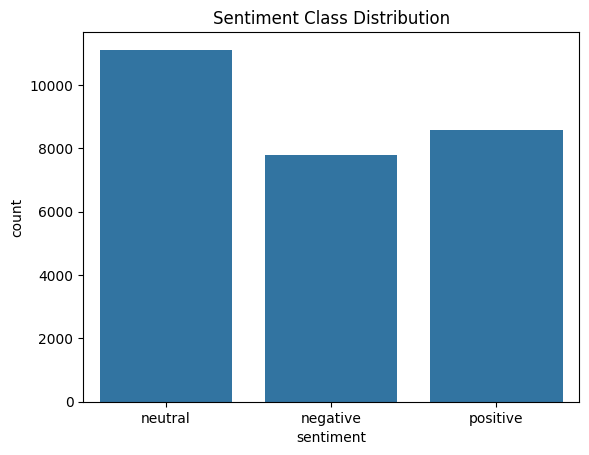

In [4]:
# 📦 Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 📂 Load Data
df = pd.read_csv("C:/Users/naveen/Downloads/Tweets.csv")
df = df.dropna(subset=['text', 'sentiment'])

# 🧹 Clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r"[^\w\s]", '', text)
    text = re.sub(r"\d+", '', text)
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

# 🔁 Encode sentiment
le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

# 🧪 Split data
X = df['cleaned_text']
y = df['sentiment_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🚀 Create and train pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('model', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)

# 🔮 Predict
y_pred = pipeline.predict(X_test)

# ✅ Accuracy
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))

# # 📄 Classification Report
# print("\n📄 Classification Report:\n")
# print(classification_report(y_test, y_pred, target_names=le.classes_))

# # 🔥 Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
#             xticklabels=le.classes_, yticklabels=le.classes_)
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()
# Check for missing values
df.isnull().sum()

# Drop rows with missing values in important columns
df = df.dropna(subset=['text', 'sentiment'])

# Optional: Visualize class distribution
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Class Distribution")
plt.show()

# Encode target labels
le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

# Clean text (basic)
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r"[^\w\s]", '', text)
    text = re.sub(r"\d+", '', text)
    return text

df['cleaned_text'] = df['text'].apply(clean_text)
